In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_3 = np.loadtxt('class3_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_3_val = np.loadtxt('class3_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_3_test = np.loadtxt('class3_test.txt')

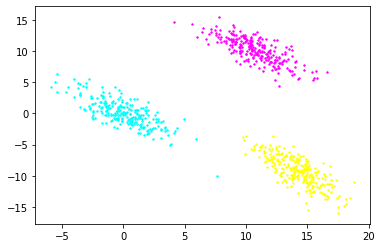

In [3]:
# simply visualising data
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)
plt.scatter(X_3[:, 0], X_3[:, 1], color = 'yellow', s = 2)

In [233]:
# Gradient Descent function
def p(X, W):
    return 1/(1+np.exp(-np.dot(X, W)))
def loss(X_1, X_2, W):
    return -(np.sum(np.log(p(X_1, W)))+np.sum(np.log(1-p(X_2, W))))
def GD(X_1, X_2, alpha = 0.01, epochs = 10, verbose = False):
    W = np.random.randn(X_1.shape[1])
    if verbose:
        print('Epoch: ', 0, ' Loss: ', loss(X_1, X_2, W))
    for epoch in range(1, epochs+1):
        for x in X_1:
            w = W+alpha*np.dot(p(x, W)-1, x)
        for x in X_2:
            w = W+alpha*np.dot(p(x, W), x)
        W = W-alpha*(np.dot(p(X_1, W)-1, X_1)+np.dot(p(X_2, W), X_2))
        if verbose:
            print('Epoch: ', epoch, ' Loss: ', loss(X_1, X_2, W))
    return W

In [234]:
# finding logistic parameters
X_1_aug = np.ones((X_1.shape[0], 3))
X_1_aug[:, 1:3] = X_1
X_2_aug = np.ones((X_2.shape[0], 3))
X_2_aug[:, 1:3] = X_2
X_3_aug = np.ones((X_3.shape[0], 3))
X_3_aug[:, 1:3] = X_3
X_1_test_aug = np.ones((X_1_test.shape[0], 3))
X_1_test_aug[:, 1:3] = X_1_test
X_2_test_aug = np.ones((X_2_test.shape[0], 3))
X_2_test_aug[:, 1:3] = X_2_test
X_3_test_aug = np.ones((X_3_test.shape[0], 3))
X_3_test_aug[:, 1:3] = X_3_test


# class 1 vs 2
alpha = 0.01
W12 = GD(X_1_aug, X_2_aug, epochs = 100)

# class 2 vs 3
alpha = 0.01
W23 = GD(X_2_aug, X_3_aug, epochs = 100)

# class 3 vs 1
alpha = 0.01
W31 = GD(X_3_aug, X_1_aug, epochs = 100)

/home/shashi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [235]:
# Logistic model based on voting
def c1_vs_c2(x):
    if np.dot(W12, x) > 0:
        return 0
    else:
        return 1
    
def c2_vs_c3(x):
    if np.dot(W23, x) > 0:
        return 1
    else:
        return 2
    
def c3_vs_c1(x):
    if np.dot(W31, x) > 0:
        return 2
    else:
        return 0

def predict(x):
    if c1_vs_c2(x) == 0 and c3_vs_c1(x) == 0:
        return 0
    if c1_vs_c2(x) == 1 and c2_vs_c3(x) == 1:
        return 1
    if c2_vs_c3(x) == 2 and c3_vs_c1(x) == 2:
        return 2

In [236]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((3, 3))
X = [X_1_test_aug, X_2_test_aug, X_3_test_aug]
for i in range(3):
    for x in X[i]:
        ConfusionMatrix[predict(x), i] = ConfusionMatrix[predict(x), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2', 'Predicted 3'],['True 1', 'True 2', 'True 3'])

,True 1,True 2,True 3
Predicted 1,100.0,0.0,0.0
Predicted 2,0.0,100.0,0.0
Predicted 3,0.0,0.0,100.0


In [237]:
# performance measures
N = np.sum(ConfusionMatrix, axis = 0)
TP = np.diagonal(ConfusionMatrix)
TN = np.sum(TP)-TP
FP = np.sum(ConfusionMatrix, axis = 1)-TP
FN = np.sum(ConfusionMatrix, axis = 0)-TP
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy.tolist(),
    'Mean Accuracy': np.mean(Accuracy)
})
print({
    'Precision: ': Precision.tolist(),
    'Mean Precision': np.mean(Precision)
})
print({
    'Recall: ': Recall.tolist(),
    'Mean Recall': np.mean(Recall)
})
print({
    'F_measure: ': F_measure.tolist(),
    'Mean F_measure': np.mean(F_measure)
})

{'Accuracy: ': [100.0, 100.0, 100.0], 'Mean Accuracy': 100.0}
{'Precision: ': [1.0, 1.0, 1.0], 'Mean Precision': 1.0}
{'Recall: ': [1.0, 1.0, 1.0], 'Mean Recall': 1.0}
{'F_measure: ': [1.0, 1.0, 1.0], 'Mean F_measure': 1.0}


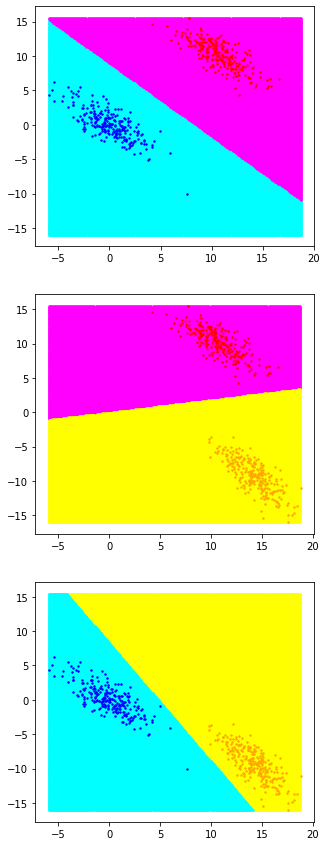

In [238]:
# decision region plot for every pair of classes with the respective training data superimposed
plt.rcParams['figure.figsize'] = [5, 15]
fig, axs = plt.subplots(3, 1)
x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1])])

# class 1 v class 2
x_1 = []
x_2 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = c1_vs_c2([1, x, y])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
axs[0].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[0].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[0].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[0].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)

# class 2 v class 3
x_2 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = c2_vs_c3([1, x, y])
        if c == 1:
            x_2.append([x, y])
        elif c == 2:
            x_3.append([x, y])
x_2 = np.array(x_2)
x_3 = np.array(x_3)
axs[1].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[1].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[1].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
axs[1].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)

# class 3 v class 1
x_3 = []
x_1 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = c3_vs_c1([1, x, y])
        if c == 2:
            x_3.append([x, y])
        elif c == 0:
            x_1.append([x, y])
x_3 = np.array(x_3)
x_1 = np.array(x_1)
axs[2].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[2].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[2].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)
axs[2].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)

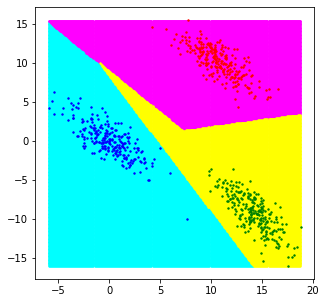

In [239]:
# Decision region plot for all the classes together with the training data superposed
plt.rcParams['figure.figsize'] = [5, 5]
x_1 = []
x_2 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = predict([1, x, y])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
        else:
            x_3.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
plt.scatter(X_3[:, 0], X_3[:, 1], color = 'green', s = 2)